# HomeWork

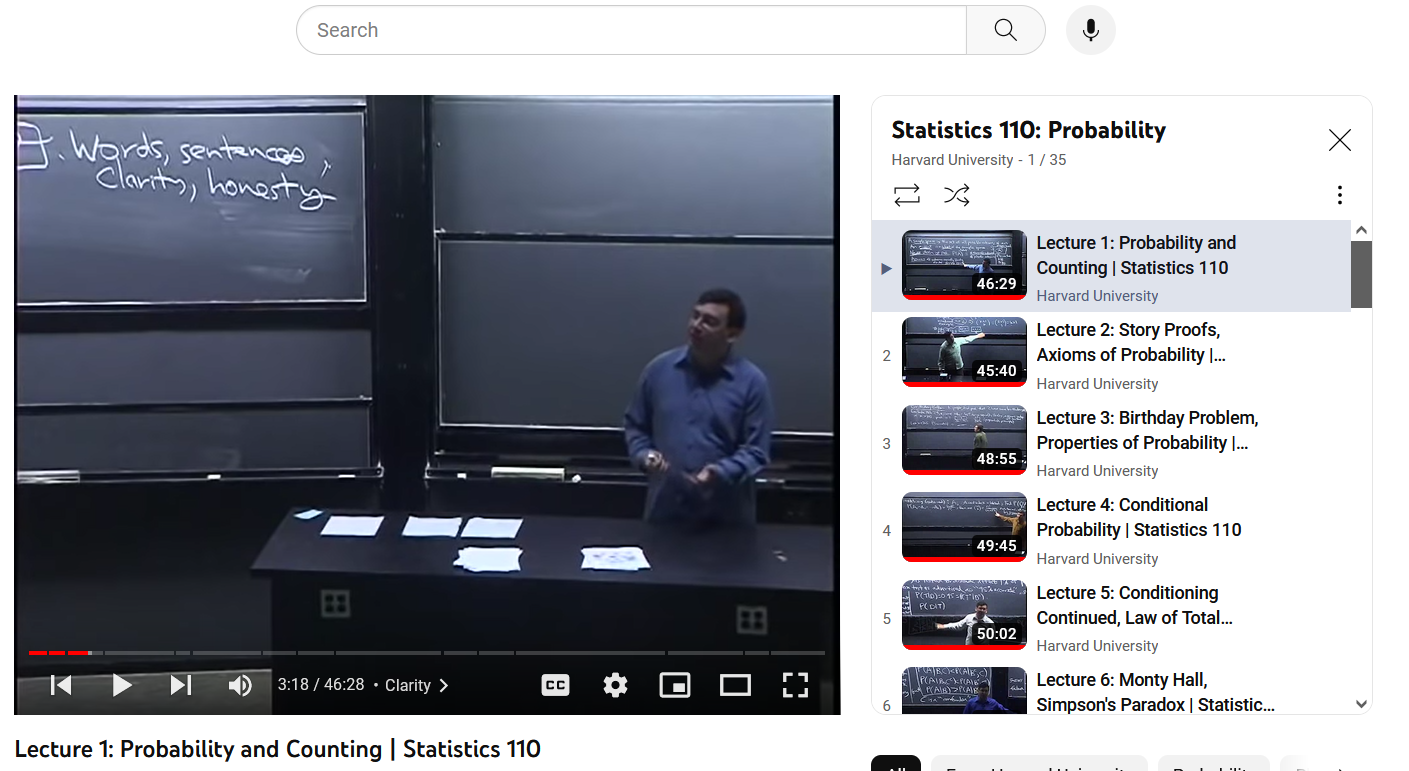

Distributions

https://youtu.be/KbB0FjPg0mw?si=xNJ86e6gvfd5aP1i

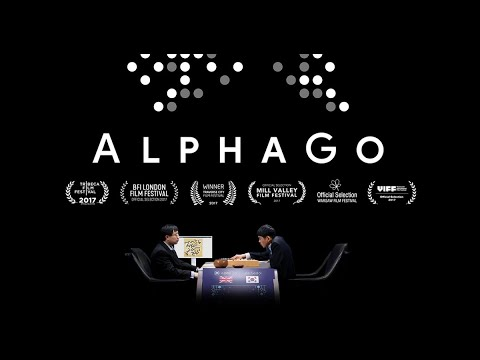

https://www.youtube.com/watch?v=WXuK6gekU1Y

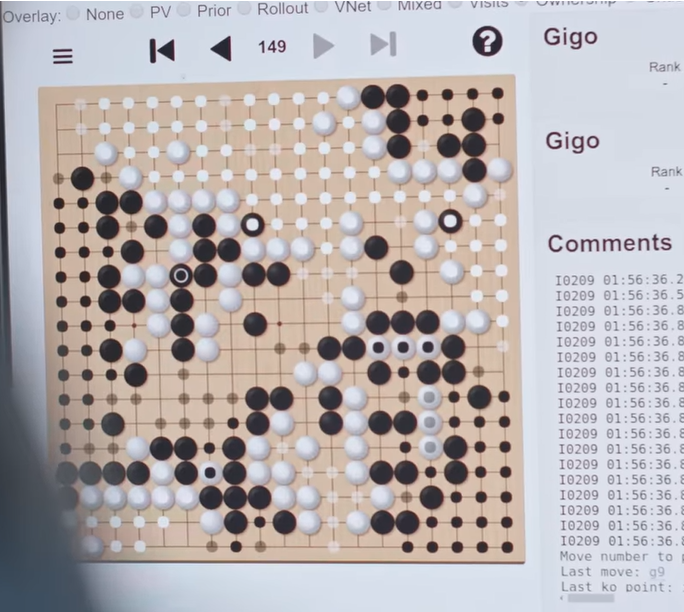

# Get Our Data again to test Data Imputation


In [ ]:
!gdown 10ATA1I0nTMyLXVH7eKB1mJo87vatIySV
!gdown 1QHutqAPBI88tAlTu_Lobc5c5buhEAatV

Downloading...
From: https://drive.google.com/uc?id=10ATA1I0nTMyLXVH7eKB1mJo87vatIySV
To: /content/train.csv
100% 61.2k/61.2k [00:00<00:00, 65.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QHutqAPBI88tAlTu_Lobc5c5buhEAatV
To: /content/test.csv
100% 28.6k/28.6k [00:00<00:00, 48.1MB/s]


# Titanic Data Description

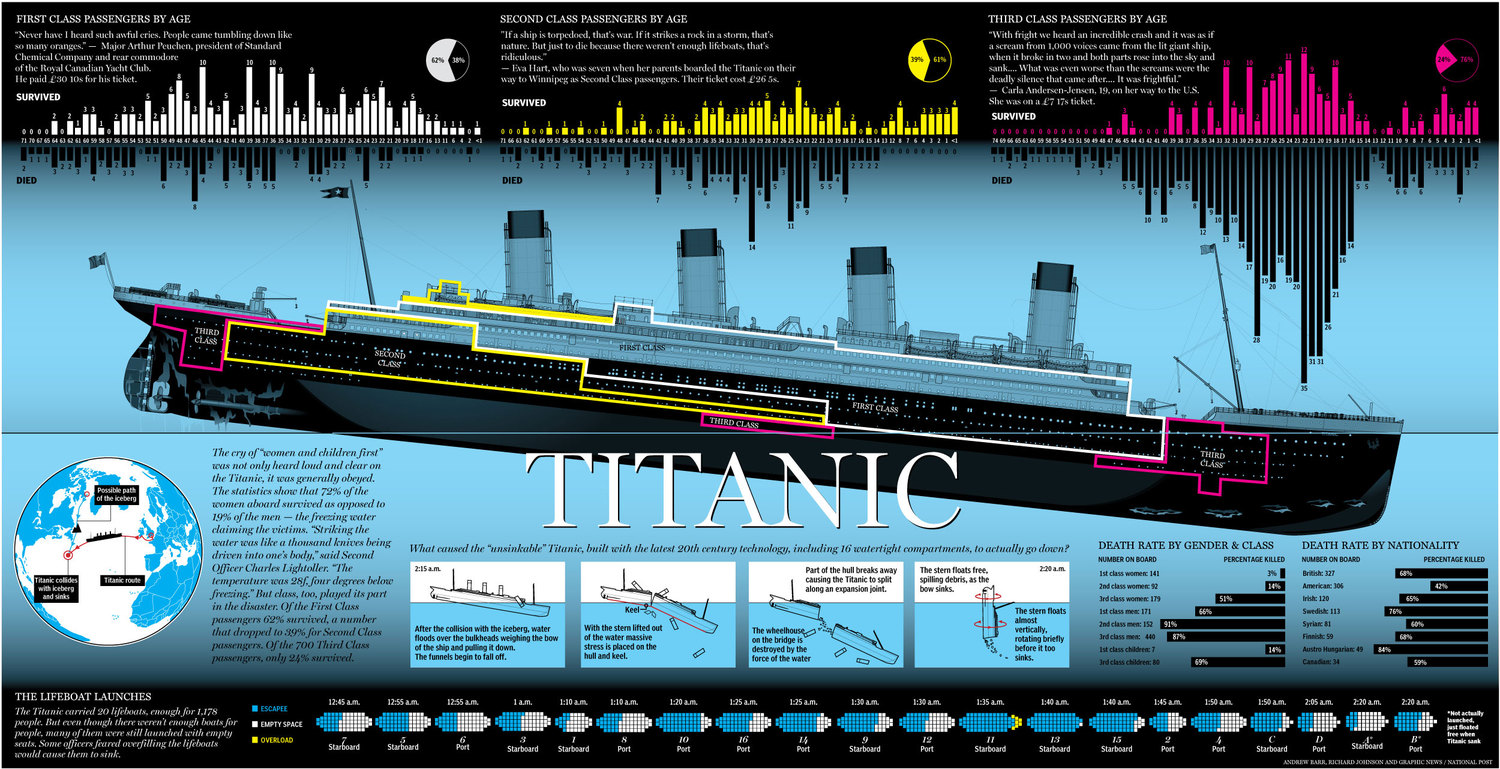



Below is a brief information about each columns of the dataset:

    PassengerId: An unique index for passenger rows. It starts from 1 for first row and increments by 1 for every new rows.

    Survived: Shows if the passenger survived or not. 1 stands for survived and 0 stands for not survived.

    Pclass: Ticket class. 1 stands for First class ticket. 2 stands for Second class ticket. 3 stands for Third class ticket.

    Name: Passenger's name. Name also contain title. "Mr" for man. "Mrs" for woman. "Miss" for girl. "Master" for boy.

    Sex: Passenger's sex. It's either Male or Female.

    Age: Passenger's age. "NaN" values in this column indicates that the age of that particular passenger has not been recorded.

    SibSp: Number of siblings or spouses travelling with each passenger.
    Parch: Number of parents of children travelling with each passenger.
    Ticket: Ticket number.
    Fare: How much money the passenger has paid for the travel journey.
    Cabin: Cabin number of the passenger. "NaN" values in this column indicates that the cabin number of that particular passenger has not been recorded.
    Embarked: Port from where the particular passenger was embarked/boarded (Southampton, Cherbourg, and Queenstown).



In [ ]:
# Import data analysis modules
import numpy as np
import pandas as pd
# Import visualization modules
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Use pandas to read csv file
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]
# train_df.head()
train_df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

# Feature Selection

In [ ]:
features_drop = ['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin']# , 'FamilySize'
train_df= train_df.drop(features_drop, axis=1)
test = test_df.drop(features_drop, axis=1)
train_df= train_df.drop(['PassengerId'], axis=1) # , 'AgeBand', 'FareBand'

# Data Imputation (Caution!!!)

Since ‘Embarked’ only had two missing values and the largest number of commuters embarked from Southampton, the probability of boarding from Southampton is higher. So, we fill the missing values with Southampton. However, instead of manually putting in Southampton, we would find the mode of the Embarked column and substitute missing values with it.
The mode is the most frequently occurring element in a series.

Age was the most intricate column to be filled. Age had 263 missing values. The people are categorized on the basis of their salutations. A basic string split was enough to extract the title from each name. There were 18 different titles.

In [ ]:
# train_df.Embarked.fillna(train_df.Embarked.mode()[0], inplace = True)
# train_df.Cabin = train_df.Cabin.fillna('NA') # missing data
# train_df['Salutation'] = train_df.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
# grp = train_df.groupby(['Sex', 'Pclass'])
# # The median of the group was then substituted in the missing rows.
# grp.Age.apply(lambda x: x.fillna(x.median()))
# train_df.Age.fillna(train_df.Age.median, inplace = True)

# Encoding
convert the non-numeric data to numeric data.
The label encoder would substitute ‘male’ values with some number and ‘female’ values with some different number.

In [ ]:
# train_df['Sex'] = LabelEncoder().fit_transform(train_df['Sex'])

In [ ]:
train_df.head()

Survived  Pclass     Sex   Age     Fare Embarked
0         0       3    male  22.0   7.2500        S
1         1       1  female  38.0  71.2833        C
2         1       3  female  26.0   7.9250        S
3         1       1  female  35.0  53.1000        S
4         0       3    male  35.0   8.0500        S

In [ ]:
test_df.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [ ]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

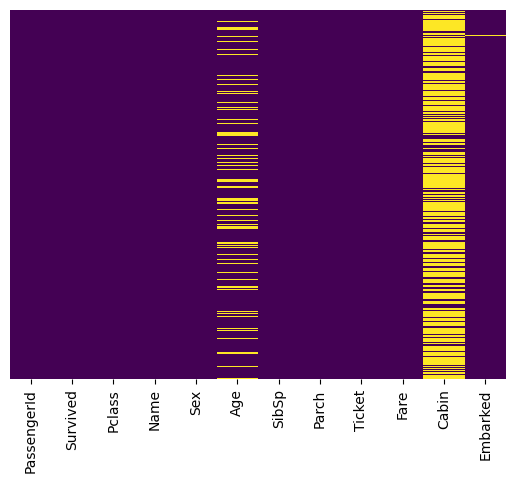

In [ ]:
# Use seaborn to conduct heatmap to identify missing data
# data -> argument refers to the data to creat heatmap
# yticklabels -> argument avoids plotting the column names
# cbar -> argument identifies if a colorbar is required or not
# cmap -> argument identifies the color of the heatmap
missing_values = train_df.isnull()
sns.heatmap(data = missing_values, yticklabels=False, cbar=False, cmap='viridis')

<Axes: xlabel='Survived', ylabel='count'>

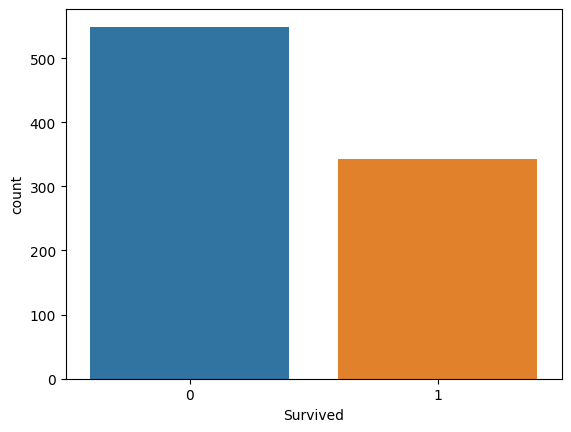

In [ ]:
# Use the countplot() method to identify ratio of who survived vs. not
# (Tip) very helpful to get a visualization of the target label
# x -> argument referes to column of interest
# data -> argument refers to dataset
sns.countplot(x='Survived', data=train_df)

<Axes: xlabel='Survived', ylabel='count'>

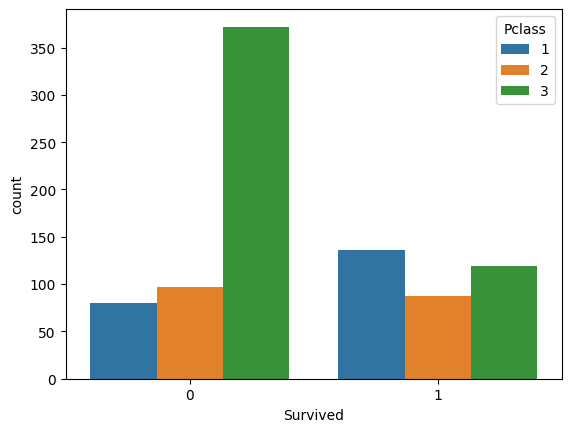

In [ ]:
# Use the countplot() method to identify ratio of who survived vs. not with interest in Passenger class
# x -> argument referes to column of interest
# data -> argument refers to dataset
# hue -> allows another level to subdivide data
# palette -> argument refers to plot color
sns.countplot(x='Survived', data=train_df, hue='Pclass')

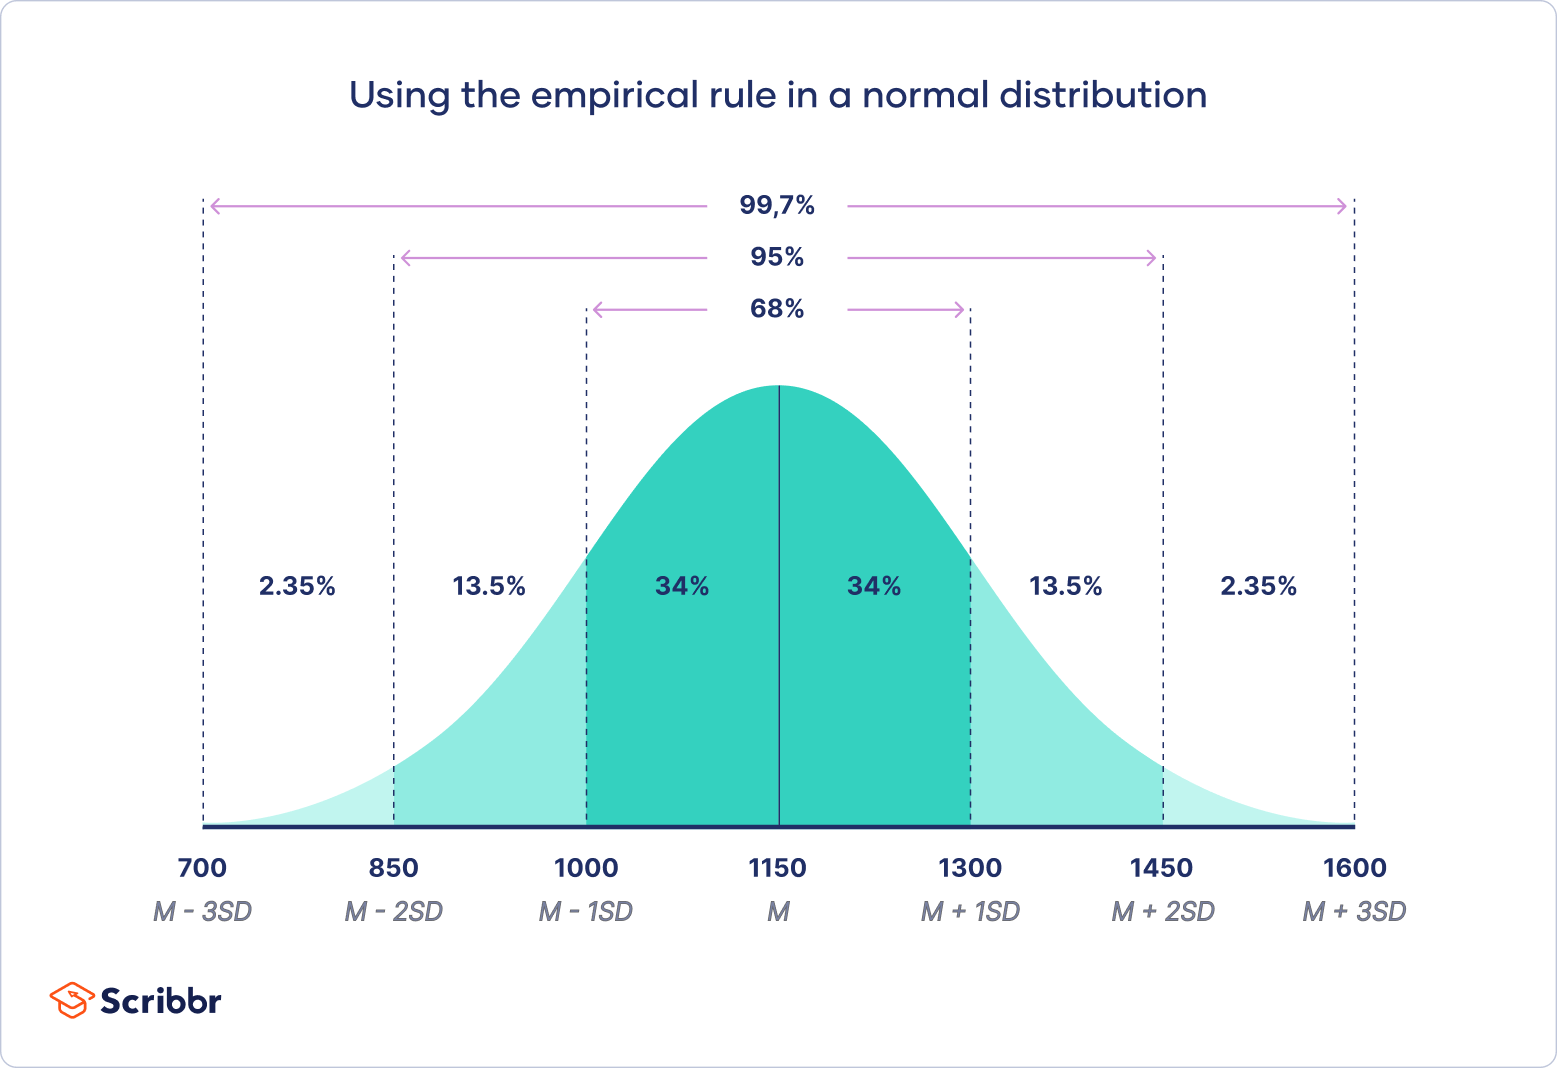

<Axes: xlabel='Pclass', ylabel='Age'>

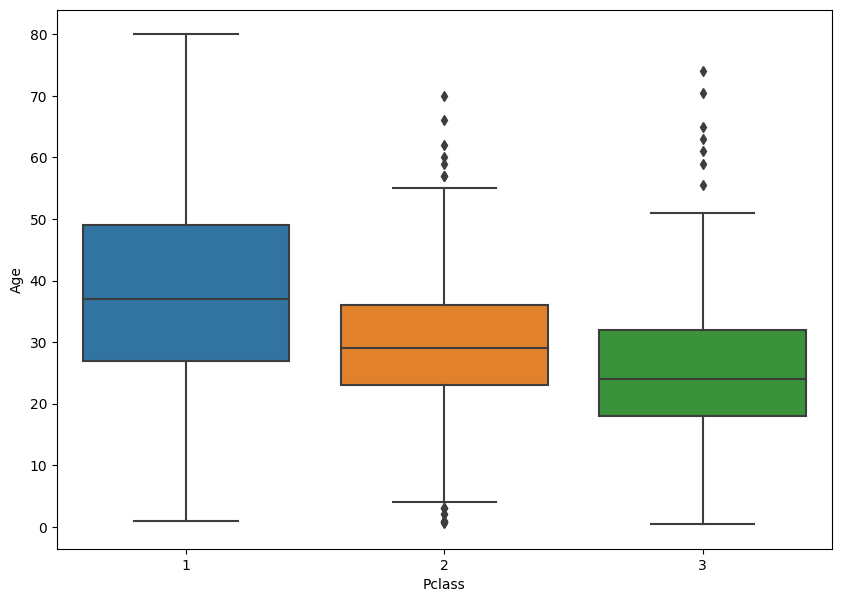

In [ ]:
import matplotlib.pyplot as plt
#identify outlier with .boxplot() method
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train_df)
# datos atipicos

https://www.mastersindatascience.org/learning/how-to-deal-with-missing-data/

# Types of Missing Data
##Missing completely at random
Missing completely at random (MCAR) is defined as when the probability that the data are missing is not related to either the specific value which is supposed to be obtained or the set of observed responses.
The statistical advantage of data that are MCAR is that the analysis remains unbiased. Power may be lost in the design, but the estimated parameters are not biased by the absence of the data.

##Missing at random

Missing at random (MAR) is a more realistic assumption for the studies performed in the anesthetic field. Data are regarded to be MAR when the probability that the responses are missing depends on the set of observed responses, but is not related to the specific missing values which is expected to be obtained.

As we tend to consider randomness as not producing bias, we may think that MAR does not present a problem. However, MAR does not mean that the missing data can be ignored. If a dropout variable is MAR, we may expect that the probability of a dropout of the variable in each case is conditionally independent of the variable, which is obtained currently and expected to be obtained in the future, given the history of the obtained variable prior to that case.
##Missing not at random

If the characters of the data do not meet those of MCAR or MAR, then they fall into the category of missing not at random (MNAR).

The cases of MNAR data are problematic. The only way to obtain an unbiased estimate of the parameters in such a case is to model the missing data. The model may then be incorporated into a more complex one for estimating the missing values.


# Deletion

There are two primary methods for deleting data when dealing with missing data: listwise and dropping variables.
## Listwise

In this method, all data for an observation that has one or more missing values are deleted. The analysis is run only on observations that have a complete set of data. If the data set is small, it may be the most efficient method to eliminate those cases from the analysis. However, in most cases, the data are not missing completely at random (MCAR). Deleting the instances with missing observations can result in biased parameters and estimates and reduce the statistical power of the analysis.
## Pairwise

Pairwise deletion assumes data are missing completely at random (MCAR), but all the cases with data, even those with missing data,  are used in the analysis. Pairwise deletion allows data scientists to use more of the data. However, the resulting statistics may vary because they are based on different data sets. The results may be impossible to duplicate with a complete set of dataExternal link:open_in_new.
## Dropping Variables

If data is missing for more than 60% of the observationsExternal link:open_in_new, it may be wise to discard it if the variable is insignificant.


# Imputation

When data is missing, it may make sense to delete data, as mentioned above. However, that may not be the most effective option. For example, if too much information is discarded, it may not be possible to complete a reliable analysis. Or there may be insufficient data to generate a reliable prediction for observations that have missing data.

Instead of deletion, data scientists have multiple solutions to impute the value of missing data. Depending why the data are missing, imputation methods can deliver reasonably reliable results. These are examples of single imputation methods for replacing missing data.
## Mean, Median and Mode

This is one of the most common methods of imputing values when dealing with missing data. In cases where there are a small number of missing observations, data scientists can calculate the mean or median of the existing observationsExternal link:open_in_new. However, when there are many missing variables, mean or median results can result in a loss of variation in the data.External link:open_in_new This method does not use time-series characteristics or depend on the relationship between the variables.
## Time-Series Specific Methods

Another option is to use time-series specific methods when appropriate to impute data. There are four types of time-series dataExternal link:open_in_new:

    No trend or seasonality.
    Trend, but no seasonality.
    Seasonality, but no trend.
    Both trend and seasonality.

The time series methods of imputation assume the adjacent observations will be like the missing data. These methods work well when that assumption is valid. However, these methods won’t always produce reasonable results, particularly in the case of strong seasonality.  
## Last Observation Carried Forward (LOCF) & Next Observation Carried Backward (NOCB)

These options are used to analyze longitudinal repeated measures dataExternal link:open_in_new, in which follow-up observations may be missing. In this method, every missing value is replaced with the last observed value. Longitudinal data track the same instance at different points along a timeline. This method is easy to understand and implement. However, this method may introduce bias when data has a visible trend. It assumes the value is unchanged by the missing data.
##Linear Interpolation

Linear interpolation is often used to approximate a value of some function by using two known values of that function at other points. This formula can also be understood as a weighted average. The weights are inversely related to the distance from the end points to the unknown point. The closer point has more influence than the farther point.

When dealing with missing data, you should use this method in a time series that exhibits a trend line, but it’s not appropriate for seasonal data.
##Seasonal Adjustment with Linear Interpolation

When dealing with data that exhibits both trend and seasonality characteristics, use seasonal adjustment with linear interpolation. First you would perform the seasonal adjustment by computing a centered moving average or taking the average of multiple averages – say, two one-year averages – that are offset by one period relative to another.


# Multiple Imputation

Multiple imputation is considered a good approach for data sets with a large amount of missing data. Instead of substituting a single value for each missing data point, the missing values are exchanged for values that encompass the natural variability and uncertainty of the right valuesExternal link:open_in_new. Using the imputed data, the process is repeated to make multiple imputed data sets. Each set is then analyzed using the standard analytical procedures, and the multiple analysis results are combined to produce an overall result.

The various imputations incorporate natural variability into the missing values, which creates a valid statistical inference. Multiple imputations can produce statistically valid results even when there is a small sample size or a large amount of missing data.
## K Nearest Neighbors

In this method, data scientists choose a distance measure for k neighbors, and the average is used to impute an estimate. The data scientist must select the number of nearest neighbors and the distance metric. KNN can identify the most frequent value among the neighbors and the mean among the nearest neighbors.

https://www.bu.edu/sph/files/2014/05/Marina-tech-report.pdf

Maximum Likelihood

Bayesian simulation methods



* Schafer algorithms
* Van Buuren algorithm
* Hot deck imputation methods

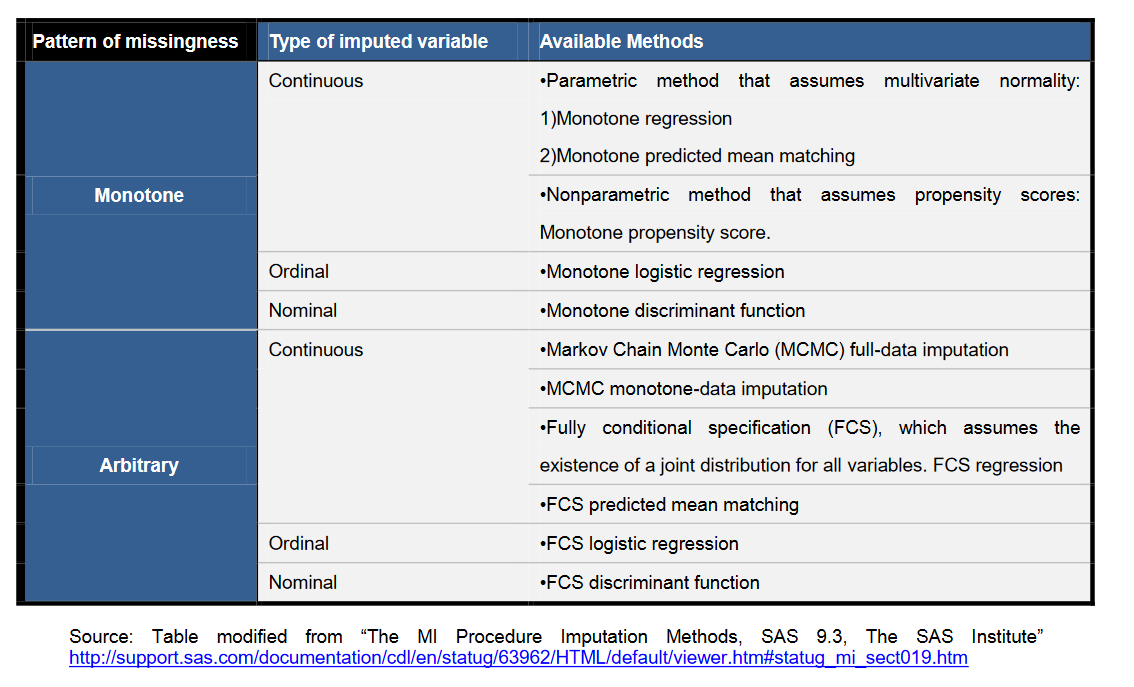

Source: Table modified from “The MI Procedure Imputation Methods, SAS 9.3, The SAS Institute”
http://support.sas.com/documentation/cdl/en/statug/63962/HTML/default/viewer.htm#statug_mi_sect019.htm

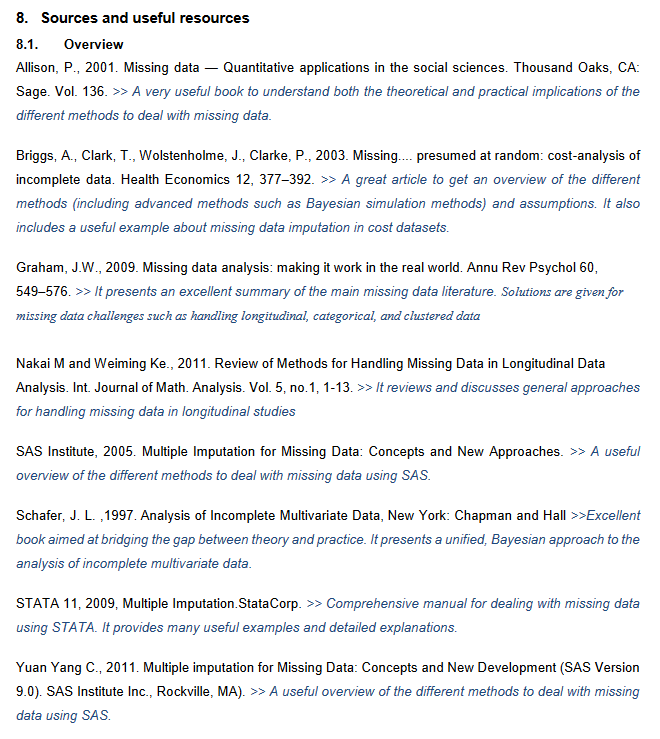

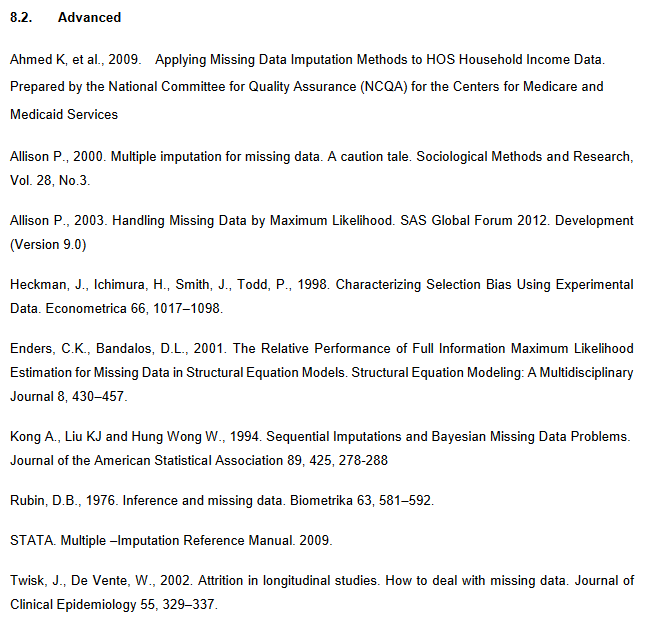

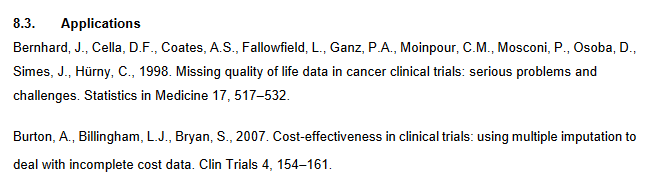

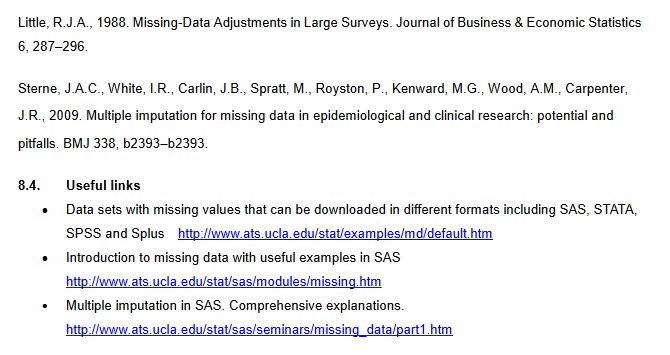

https://www.ibm.com/topics/knn

In [ ]:
a = train_df[train_df['Pclass']==1]
b = train_df[train_df['Pclass']==2]
c = train_df[train_df['Pclass']==3]
print('mean a: {}'.format(int(np.mean(a['Age']))))
print('mean b: {}'.format(int(np.mean(b['Age']))))
print('mean c: {}'.format(int(np.mean(c['Age']))))

mean a: 38
mean b: 29
mean c: 25


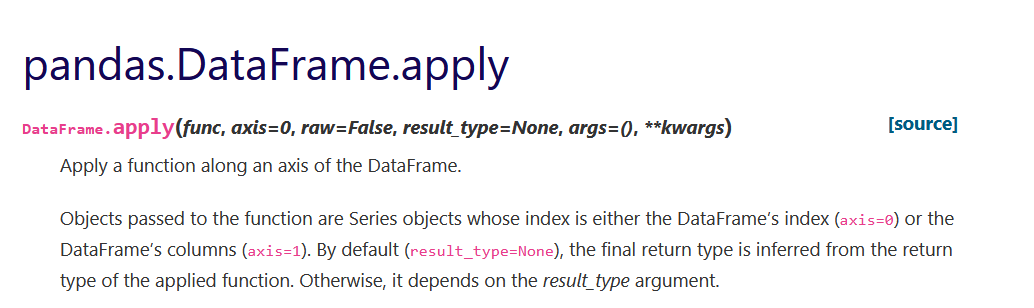

<Axes: >

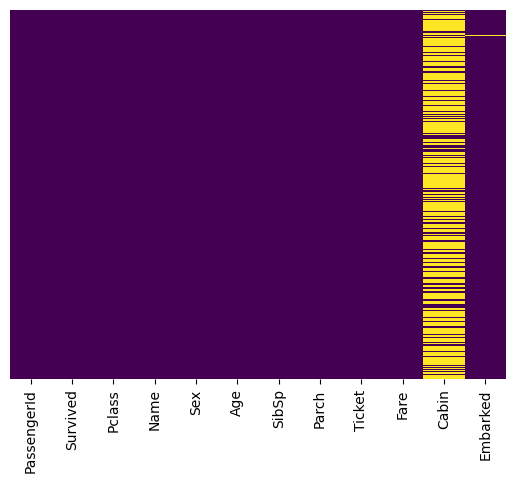

In [ ]:
# Create function to impute the age value if it is null by the mean of the age for each pclass
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 38 # mean by class
        elif Pclass == 2:
            return 29
        else:
            return 25
    else:
        return Age
# Apply function to impute the age for missing values
# The age column is at position 0
# The pclass column is at position 1
# axis -> argument refers to columns instead of rows to apply the impute_age function
train_df['Age'] = train_df[['Age', 'Pclass']].apply(impute_age, axis=1)

# create heatmap to dispaly updated age values
# yticklabels -> argument removes the column label
# cbar -> argument removes the color bar
# cmap -> argument defines the color of the map
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
# use the .drop() to remove columns that have too much missing data
#Remove rows or columns by specifying label names and corresponding axis, or by specifying directly index or column names.
#When using a multi-index, labels on different levels can be removed by specifying the level.
# axis -> refers to either row(0) or column(1) to specify
# inplace -> permanentely removes column instead of just removing the view
train_df = train_df.drop('Cabin', axis=1)
# train_df.drop('Cabin', axis=1,inplace=True)
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [ ]:
# use .dropna() to remove rows that contain missing data
# train_df.dropna(inplace=True)

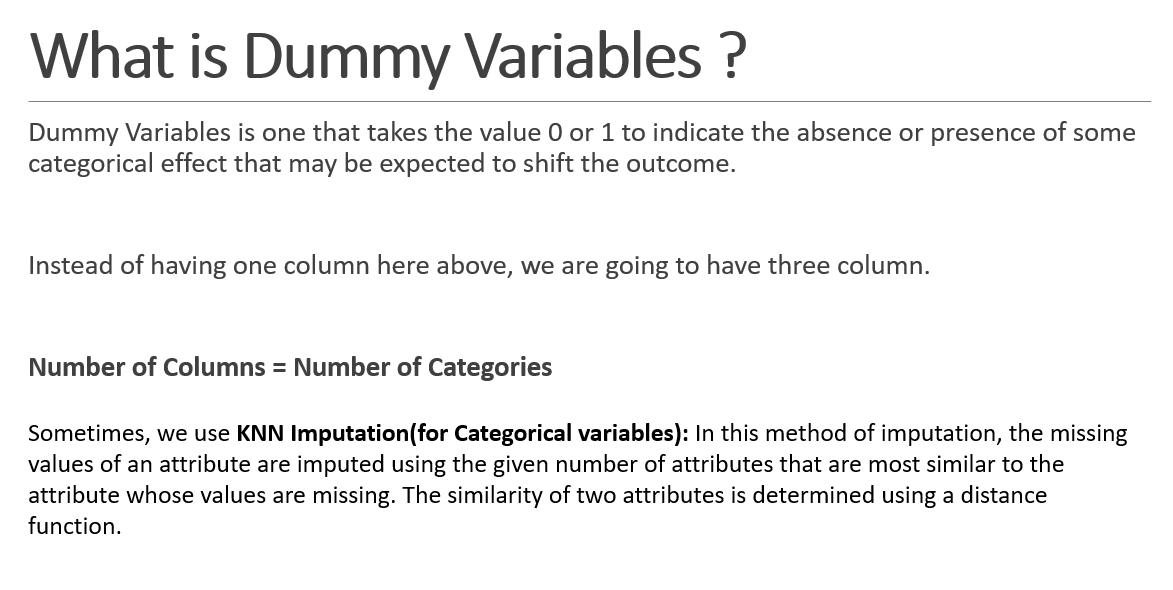

In [ ]:
# Use the .get_dummies() method to convert categorical data into dummy values
# train_df['Sex'] refers to the column we want to convert
# drop_first -> argument avoids the multicollinearity problem, which can undermines
# the statistical significance of an independent variable.
sex = pd.get_dummies(train_df['Sex'], drop_first=True)
embark = pd.get_dummies(train_df['Embarked'], drop_first=True)
# Use  .concat() method to merge the series data into one dataframe
train_df= pd.concat([train_df, sex, embark], axis=1)


In [ ]:
# Drop columns with categorical data
train_df.drop(['Sex','Embarked','Ticket','Name','PassengerId'], axis=1, inplace=True) # 'adult', 'Person', 'fare_category', Is_Alone

# Ports Embarked- Q,S,C
Embarked: Port from where the particular passenger was embarked/boarded (Southampton, Cherbourg, and Queenstown).
# Sex (Female,male)

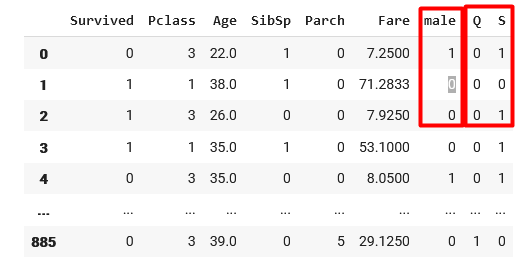

In [ ]:
train_df.drop_duplicates()

Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0           0       3  22.0      1      0   7.2500     1  0  1
1           1       1  38.0      1      0  71.2833     0  0  0
2           1       3  26.0      0      0   7.9250     0  0  1
3           1       1  35.0      1      0  53.1000     0  0  1
4           0       3  35.0      0      0   8.0500     1  0  1
..        ...     ...   ...    ...    ...      ...   ... .. ..
885         0       3  39.0      0      5  29.1250     0  1  0
887         1       1  19.0      0      0  30.0000     0  0  1
888         0       3  25.0      1      2  23.4500     0  0  1
889         1       1  26.0      0      0  30.0000     1  0  0
890         0       3  32.0      0      0   7.7500     1  1  0

[775 rows x 9 columns]

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   male      891 non-null    uint8  
 7   Q         891 non-null    uint8  
 8   S         891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 44.5 KB


In [ ]:
train_df[0:5]

Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0         0       3  22.0      1      0   7.2500     1  0  1
1         1       1  38.0      1      0  71.2833     0  0  0
2         1       3  26.0      0      0   7.9250     0  0  1
3         1       1  35.0      1      0  53.1000     0  0  1
4         0       3  35.0      0      0   8.0500     1  0  1

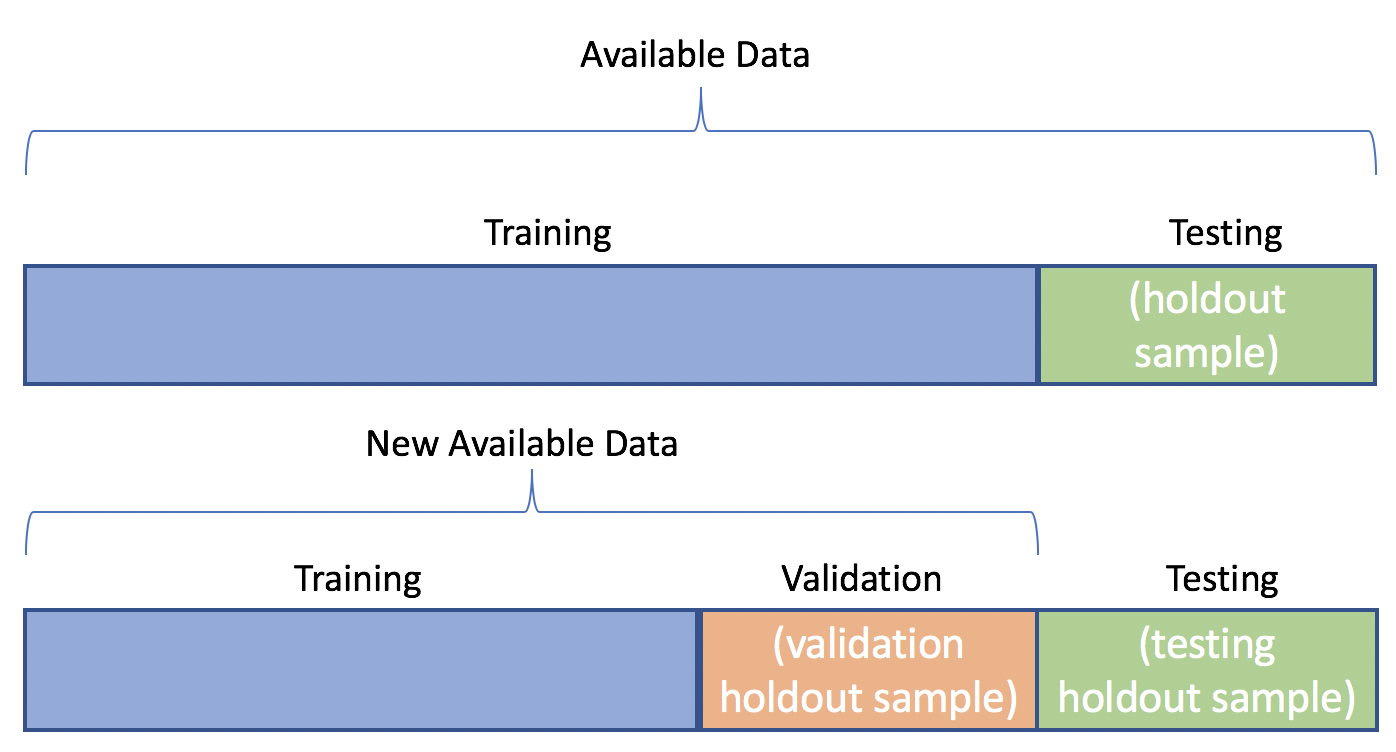

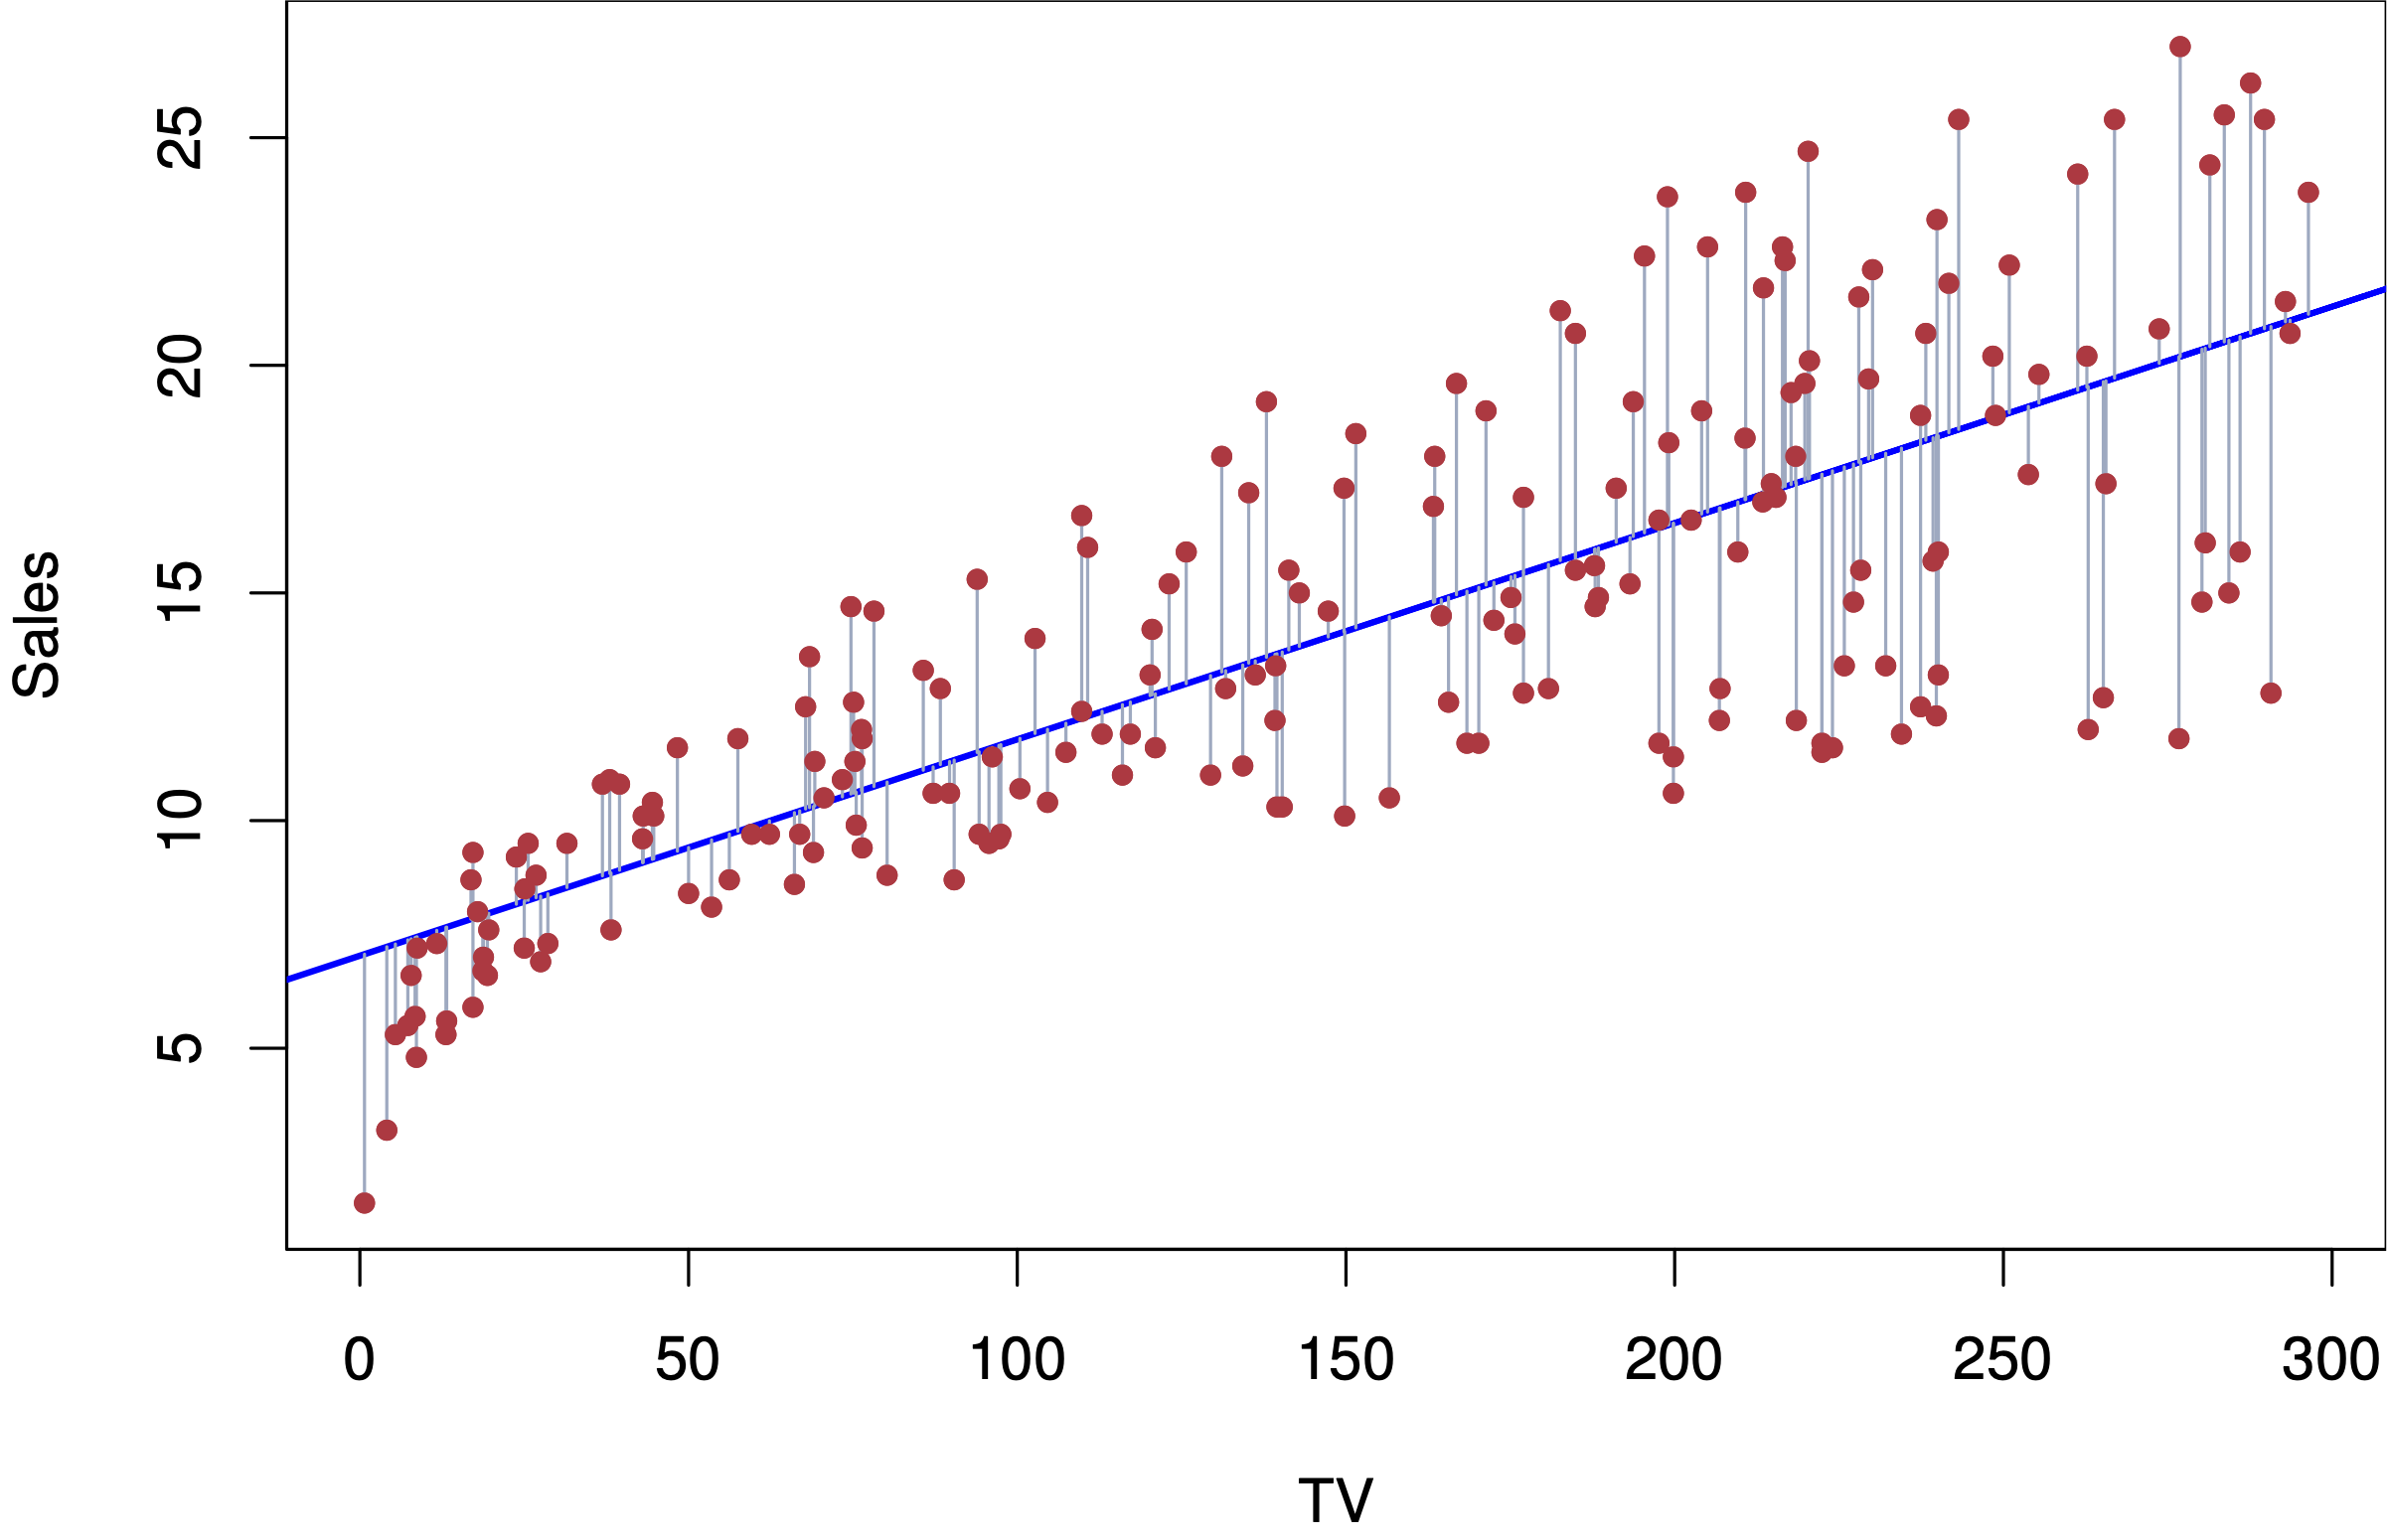

# Cross-Validation

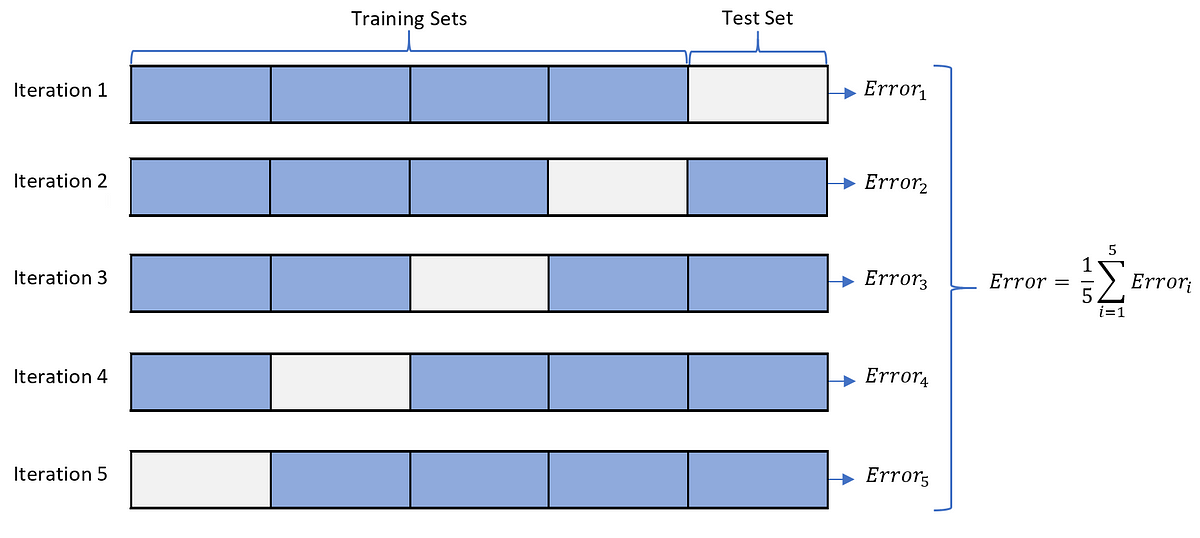

In [ ]:
# Split data into 'X' features and 'y' target label sets
X = train_df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']] # 8 columns
y = train_df['Survived']

In [ ]:
# Import module to split dataset
from sklearn.model_selection import train_test_split# Split data set into training and test sets
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X, y, test_size=0.3, random_state=101) # seed

**Quasi-Newton methods** are methods used to either find zeroes or local maxima and minima of functions, as an alternative to Newton's method. They can be used if the Jacobian or Hessian is unavailable or is too expensive to compute at every iteration. The "full" Newton's method requires the Jacobian in order to search for zeros, or the Hessian for finding extrema.




https://www.youtube.com/results?search_query=Quasi-Newton+methods

Limited-memory BFGS is an optimization algorithm in the family of quasi-Newton methods that approximates the Broyden–Fletcher–Goldfarb–Shanno algorithm using a limited amount of computer memory.
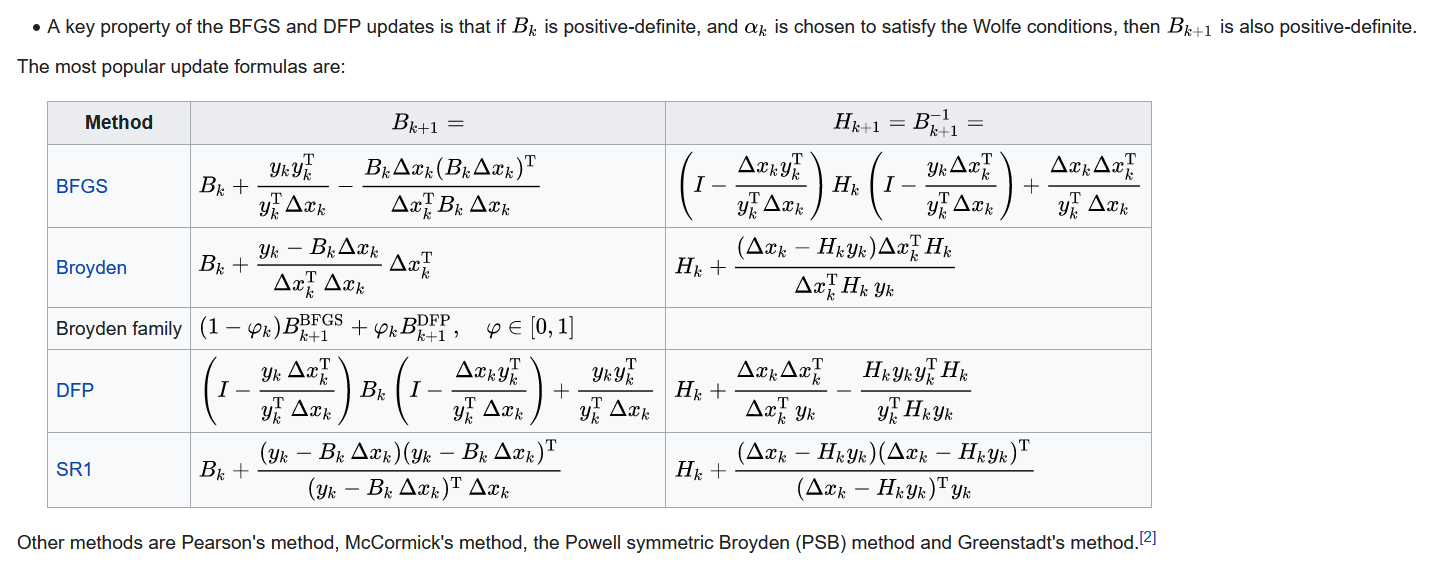

In [ ]:
# Import module for fitting
from sklearn.linear_model import LogisticRegression# Create instance (i.e. object) of LogisticRegression
#logmodel = LogisticRegression()# Fit the model using the training data
# create and configure model
# logmodel = LogisticRegression(solver='liblinear') # To maintain the old behavior
# logmodel = LogisticRegression(solver='lbfgs') # To support the new behavior
logmodel = LogisticRegression(solver='lbfgs', max_iter=3000) # To support the new behavior
# X_train_df-> parameter supplies the data features
# y_train_df-> parameter supplies the target labels
logmodel.fit(X_train_df, y_train_df)

LogisticRegression(max_iter=3000)

In [ ]:
# X_train_df, X_test_df, y_train_df, y_test_df
predictions = logmodel.predict(X_test_df)
from sklearn.metrics import classification_report
print(classification_report(y_test_df, predictions))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       154
           1       0.80      0.67      0.73       114

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.78       268



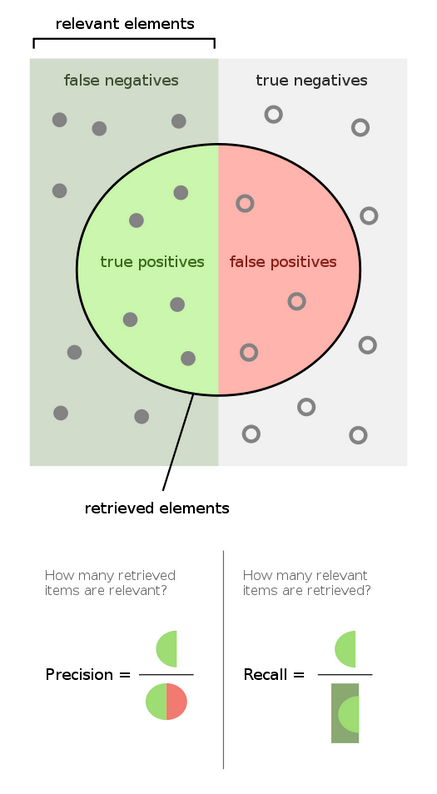

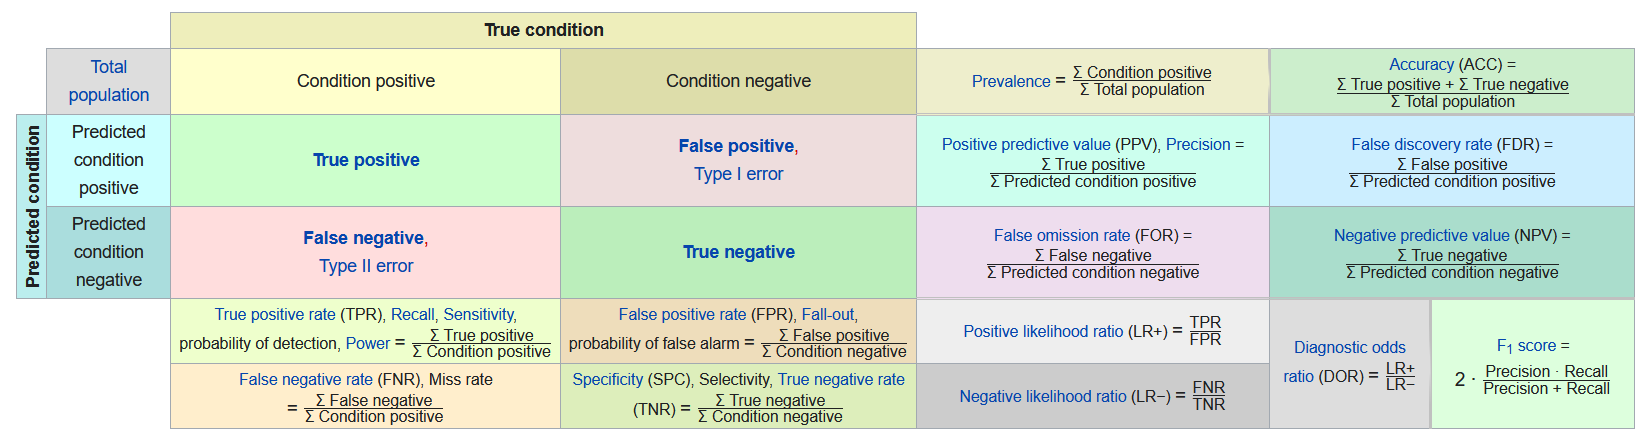

https://en.wikipedia.org/wiki/Precision_and_recall

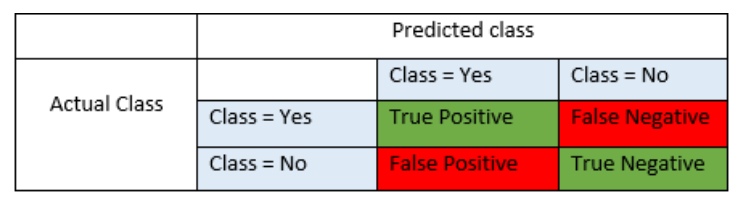

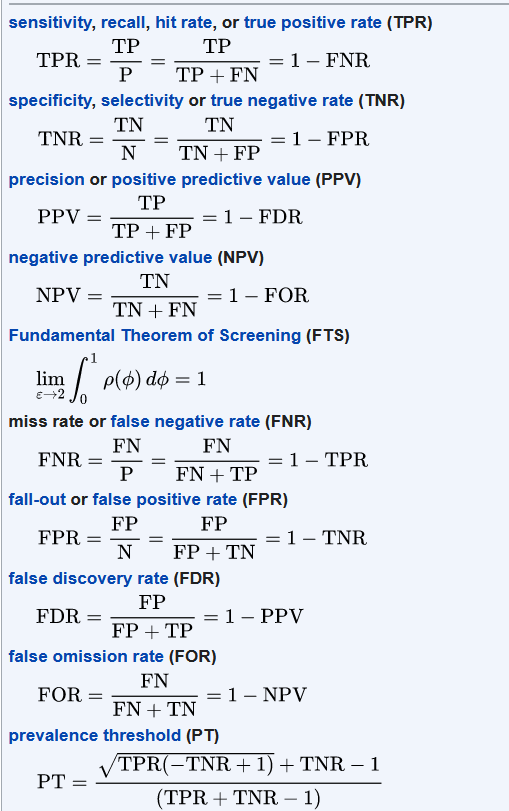

ROC AUC: 0.77


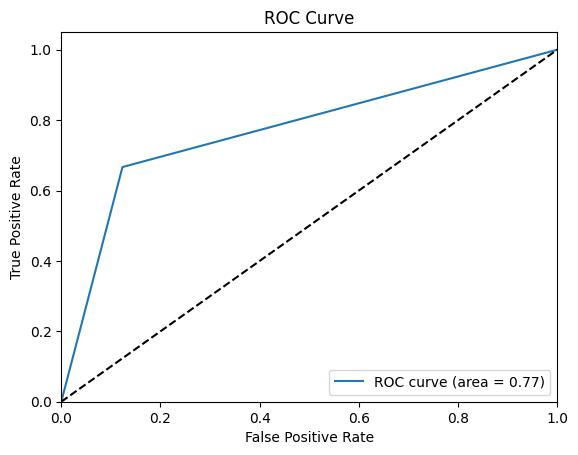

In [ ]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# X,y --0.3 test--> X_train_df, X_test_df, y_train_df, y_test_df
# Determine the false positive and true positive rates (fpr, tpr)
fpr, tpr, thresholds = roc_curve(y_test_df, predictions)

# Calculate the AUC
roc_auc = auc(fpr, tpr)
print ('ROC AUC: %0.2f' % roc_auc) # 0.77

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.903


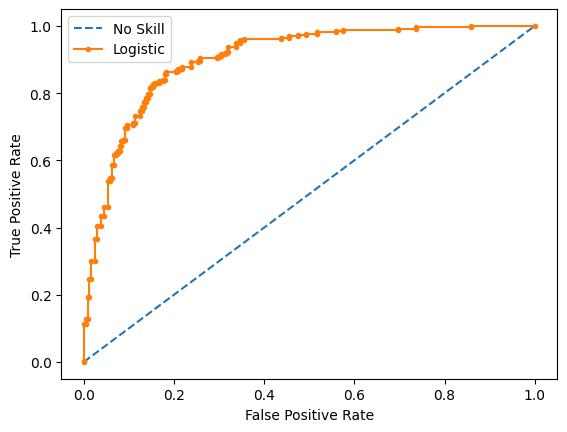

In [ ]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Generally, the use of ROC curves and precision-recall curves are as follows:

    ROC curves should be used when there are roughly equal numbers of observations for each class.
    Precision-Recall curves should be used when there is a moderate to large class imbalance.


Logistic: f1=0.841 auc=0.898


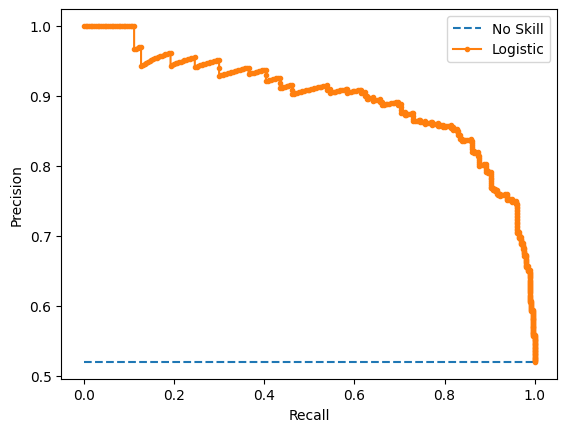

In [ ]:
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(testX)
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Below is the same ROC Curve example with a modified problem where there is a ratio of about 100:1 ratio of class=0 to class=1 observations (specifically Class0=985, Class1=15).

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.716


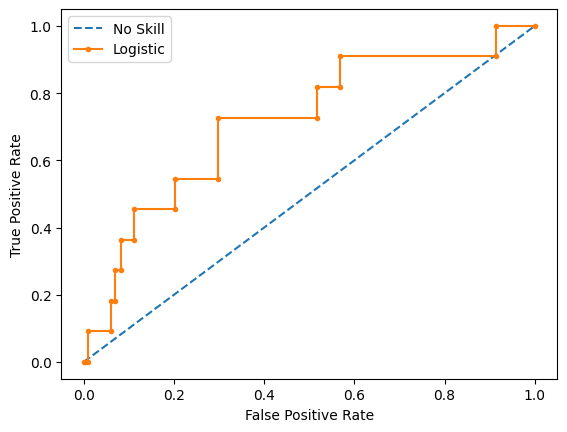

In [ ]:
# roc curve and auc on an imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99,0.01], random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

precision-recall curve

Logistic: f1=0.000 auc=0.054


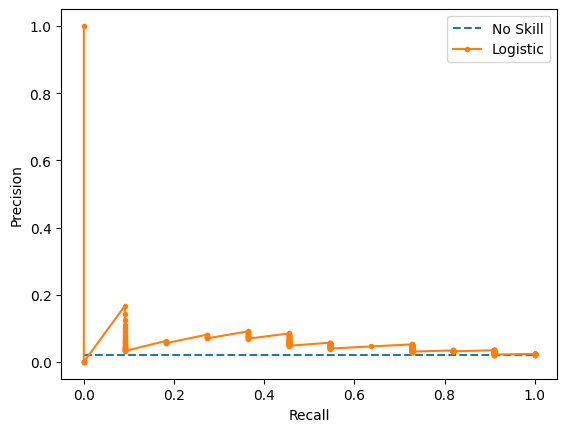

In [ ]:
# precision-recall curve and f1 for an imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99,0.01], random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(testX)
# calculate precision and recall for each threshold
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
# calculate scores
lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

We can see that the model is penalized for predicting the majority class in all cases. The scores show that the model that looked good according to the ROC Curve is in fact barely skillful when considered using using precision and recall that focus on the positive class.

The plot of the precision-recall curve highlights that the model is just barely above the no skill line for most thresholds.

This is possible because the model predicts probabilities and is uncertain about some cases. These get exposed through the different thresholds evaluated in the construction of the curve, flipping some class 0 to class 1, offering some precision but very low recall.

# Split data into 'X' features and 'y' target label sets
```python
X = train_df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']] # 8 columns
y = train_df['Survived']
```

In [ ]:
import tensorflow as tf
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense

# Initialising the NN
model = keras.Sequential()

# layers
# Initializers define the way to set the initial random weights of Keras layers.
model.add(Dense(9, kernel_initializer = 'uniform', activation = 'relu', input_dim = 8))
model.add(Dense(9, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 9)                 81        
                                                                 
 dense_5 (Dense)             (None, 9)                 90        
                                                                 
 dense_6 (Dense)             (None, 5)                 50        
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 227 (908.00 Byte)
Trainable params: 227 (908.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


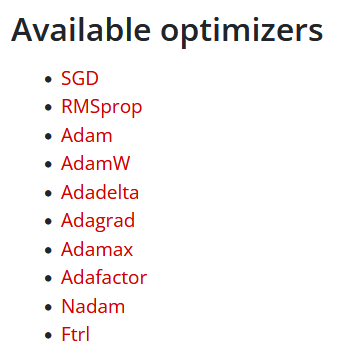

In [ ]:
# Compiling the NN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the NN
model.fit(X_train_df, y_train_df, batch_size = 32, epochs = 200)

Epoch 1/200
20/20 [==============================] - 1s 2ms/step - loss: 0.6922 - accuracy: 0.6067
Epoch 2/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.6340
Epoch 3/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.6340
Epoch 4/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6753 - accuracy: 0.6340
Epoch 5/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6563 - accuracy: 0.6340
Epoch 6/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6348 - accuracy: 0.6340
Epoch 7/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6167 - accuracy: 0.6340
Epoch 8/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6062 - accuracy: 0.6485
Epoch 9/200
20/20 [==============================] - 0s 2ms/step - loss: 0.5980 - accuracy: 0.6742
Epoch 10/200
20/20 [==============================] - 0s 2ms/step - loss: 0.5905 - accuracy: 0.6918
Epoch 11/

The decision to classify an input as positive or negative is made based on a threshold value, typically set to 0.5. If the probability value is greater than the threshold, the input is classified as positive. If the probability value is less than the threshold, the input is classified as negative.

In [ ]:
# X_train_df, X_test_df, y_train_df, y_test_df
y_pred = model.predict(X_test_df)
y_final = (y_pred > 0.5).astype(int).reshape(X_test_df.shape[0])
print(y_pred[:5])
print("-"*60)
print(y_final[:5])
print(X_test_df.shape[0])

9/9 [==============================] - 0s 5ms/step
[[0.23289855]
 [0.9053018 ]
 [0.3760449 ]
 [0.39369434]
 [0.0945681 ]]
------------------------------------------------------------
[0 1 0 0 0]
268


In [ ]:
from sklearn import metrics
Y_pred_rand = (model.predict(X_test_df) > 0.5).astype(int)
print('Precision : ', np.round(metrics.precision_score(y_test_df, Y_pred_rand)*100,2))
print('Accuracy : ', np.round(metrics.accuracy_score(y_test_df, Y_pred_rand)*100,2))
print('Recall : ', np.round(metrics.recall_score(y_test_df, Y_pred_rand)*100,2))
print('F1 score : ', np.round(metrics.f1_score(y_test_df, Y_pred_rand)*100,2))
print('AUC : ', np.round(metrics.roc_auc_score(y_test_df, Y_pred_rand)*100,2))

9/9 [==============================] - 0s 2ms/step
Precision :  78.49
Accuracy :  77.24
Recall :  64.04
F1 score :  70.53
AUC :  75.52


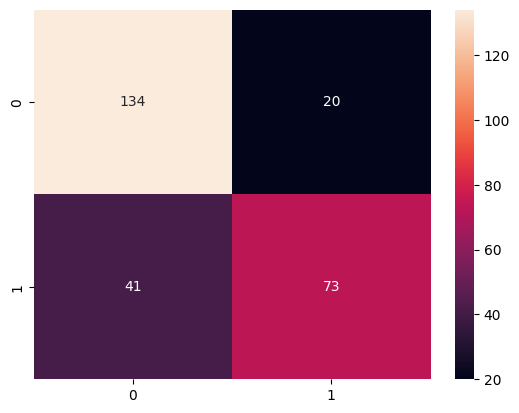

In [ ]:
# plotting the confusion matrix in heatmap
# fmt = String formatting code to use when adding annotations.
# tn,fp,fn,tp = metrics.confusion_matrix(y_train_df, Y_pred_rand)
matrix = metrics.confusion_matrix(y_test_df, Y_pred_rand)
sns.heatmap(matrix, annot = True,fmt = 'g') # fmt =.1f
plt.show()

# Organized

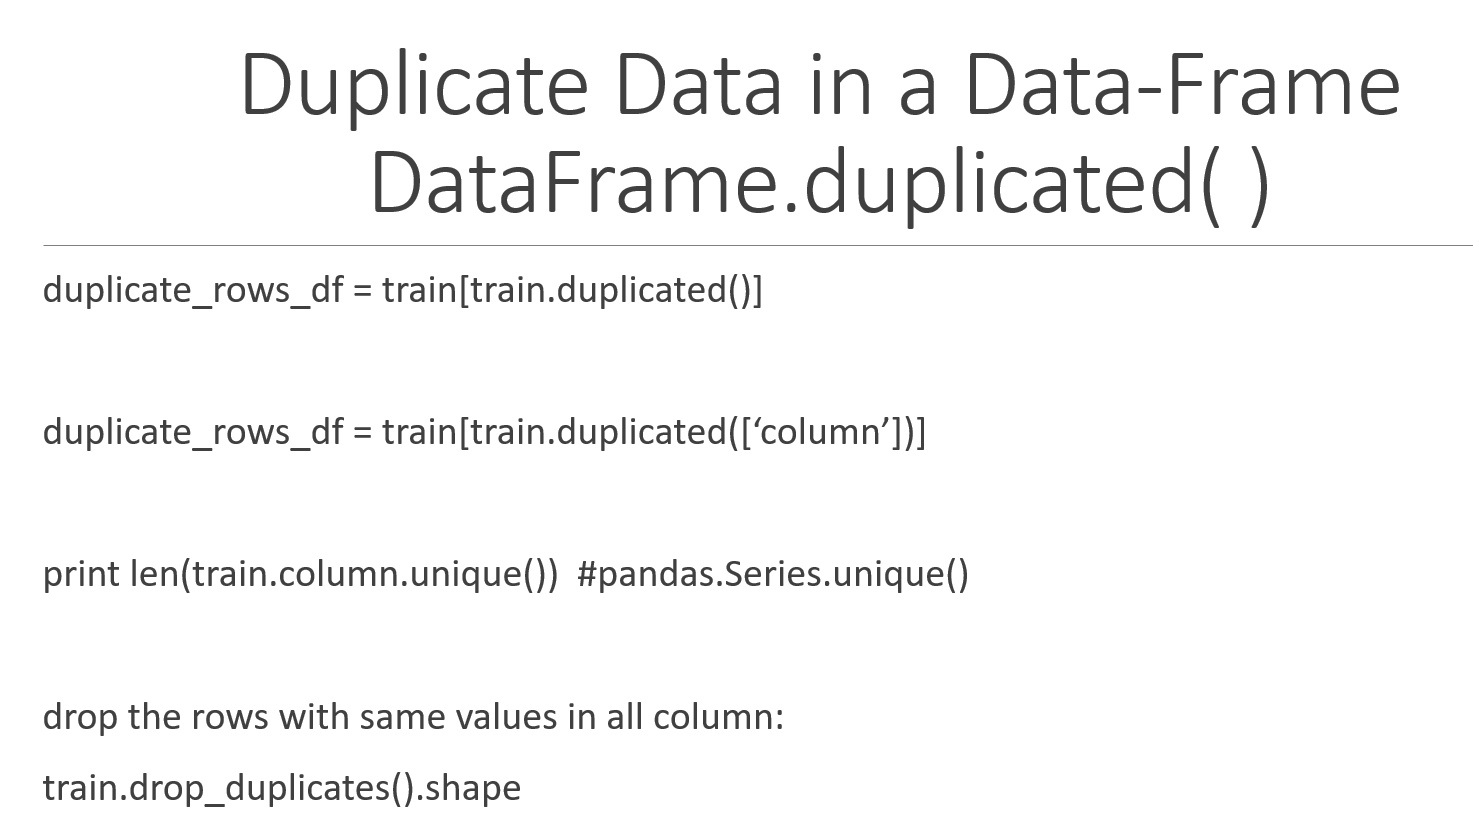

In [ ]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [ ]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [ ]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger



# What is the distribution of numerical feature values across the samples?

This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.

    Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
    Survived is a categorical feature with 0 or 1 values.
    Around 38% samples survived representative of the actual survival rate at 32%.
    Most passengers (> 75%) did not travel with parents or children.
    Nearly 30% of the passengers had siblings and/or spouse aboard.
    Fares varied significantly with few passengers (<1%) paying as high as $512.
    Few elderly passengers (<1%) within age range 65-80.



In [ ]:
train_df.describe()
# Review survived rate using `percentiles=[.61, .62]` knowing our problem description mentions 38% survival rate.
# Review Parch distribution using `percentiles=[.75, .8]`
# SibSp distribution `[.68, .69]`
# Age and Fare `[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]`

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

# What is the distribution of categorical features?

    Names are unique across the dataset (count=unique=891)
    Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
    Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
    Embarked takes three possible values. S port used by most passengers (top=S)
    Ticket feature has high ratio (22%) of duplicate values (unique=681).


In [ ]:
train_df.describe(include=['O'])

Name   Sex  Ticket    Cabin Embarked
count                       891   891     891      204      889
unique                      891     2     681      147        3
top     Braund, Mr. Owen Harris  male  347082  B96 B98        S
freq                          1   577       7        4      644


# Assumtions based on data analysis

We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.

Correlating.

We want to know how well does each feature correlate with Survival. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.

Completing.

    We may want to complete Age feature as it is definitely correlated to survival.
    We may want to complete the Embarked feature as it may also correlate with survival or another important feature.

Correcting.

    Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
    Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
    PassengerId may be dropped from training dataset as it does not contribute to survival.
    Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.

Creating.

    We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.
    We may want to engineer the Name feature to extract Title as a new feature.
    We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.
    We may also want to create a Fare range feature if it helps our analysis.

Classifying.

We may also add to our assumptions based on the problem description noted earlier.

    Women (Sex=female) were more likely to have survived.
    Children (Age<?) were more likely to have survived.
    The upper-class passengers (Pclass=1) were more likely to have survived.




# Analyze by pivoting features

To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other. We can only do so at this stage for features which do not have any empty values. It also makes sense doing so only for features which are categorical (Sex), ordinal (Pclass) or discrete (SibSp, Parch) type.

    Pclass We observe significant correlation (>0.5) among Pclass=1 and Survived (classifying #3). We decide to include this feature in our model.
    Sex We confirm the observation during problem definition that Sex=female had very high survival rate at 74% (classifying #1).
    SibSp and Parch These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features (creating #1).



In [ ]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

In [ ]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Sex  Survived
0  female  0.742038
1    male  0.188908

In [ ]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000

In [ ]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000


# Analyze by visualizing data

Now we can continue confirming some of our assumptions using visualizations for analyzing the data.
Correlating numerical features

Let us start by understanding correlations between numerical features and our solution goal (Survived).

A histogram chart is useful for analyzing continous numerical variables like Age where banding or ranges will help identify useful patterns. The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands. This helps us answer questions relating to specific bands (Did infants have better survival rate?)

Note that x-axis in historgram visualizations represents the count of samples or passengers.

Observations.

    Infants (Age <=4) had high survival rate.
    Oldest passengers (Age = 80) survived.
    Large number of 15-25 year olds did not survive.
    Most passengers are in 15-35 age range.

Decisions.

This simple analysis confirms our assumptions as decisions for subsequent workflow stages.

    We should consider Age (our assumption classifying #2) in our model training.
    Complete the Age feature for null values (completing #1).
    We should band age groups (creating #3).



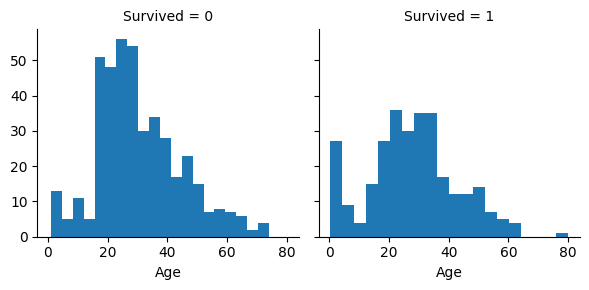

In [ ]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)


# Correlating numerical and ordinal features

We can combine multiple features for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values.

Observations.

    Pclass=3 had most passengers, however most did not survive. Confirms our classifying assumption #2.
    Infant passengers in Pclass=2 and Pclass=3 mostly survived. Further qualifies our classifying assumption #2.
    Most passengers in Pclass=1 survived. Confirms our classifying assumption #3.
    Pclass varies in terms of Age distribution of passengers.

Decisions.

    Consider Pclass for model training.



In [ ]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
# grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', aspect=1.6) #size=2.2,
# grid.map(plt.hist, 'Age', alpha=.5, bins=20)
# grid.add_legend();


# Correlating categorical features

Now we can correlate categorical features with our solution goal.

Observations.

    Female passengers had much better survival rate than males. Confirms classifying (#1).
    Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.
    Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports. Completing (#2).
    Ports of embarkation have varying survival rates for Pclass=3 and among male passengers. Correlating (#1).

Decisions.

    Add Sex feature to model training.
    Complete and add Embarked feature to model training.



In [ ]:
# grid = sns.FacetGrid(train_df, col='Embarked')
# grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
# grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
# grid.add_legend()


# Correlating categorical and numerical features

We may also want to correlate categorical features (with non-numeric values) and numeric features. We can consider correlating Embarked (Categorical non-numeric), Sex (Categorical non-numeric), Fare (Numeric continuous), with Survived (Categorical numeric).

Observations.

    Higher fare paying passengers had better survival. Confirms our assumption for creating (#4) fare ranges.
    Port of embarkation correlates with survival rates. Confirms correlating (#1) and completing (#2).

Decisions.

    Consider banding Fare feature.



In [ ]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
# grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
# grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
# grid.add_legend()

# Wrangle data

We have collected several assumptions and decisions regarding our datasets and solution requirements. So far we did not have to change a single feature or value to arrive at these. Let us now execute our decisions and assumptions for correcting, creating, and completing goals.
Correcting by dropping features

This is a good starting goal to execute. By dropping features we are dealing with fewer data points. Speeds up our notebook and eases the analysis.

Based on our assumptions and decisions we want to drop the Cabin (correcting #2) and Ticket (correcting #1) features.

Note that where applicable we perform operations on both training and testing datasets together to stay consistent.


In [ ]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))


# Creating new feature extracting from existing

We want to analyze if Name feature can be engineered to extract titles and test correlation between titles and survival, before dropping Name and PassengerId features.

In the following code we extract Title feature using regular expressions. The RegEx pattern (\w+\.) matches the first word which ends with a dot character within Name feature. The expand=False flag returns a DataFrame.

Observations.

When we plot Title, Age, and Survived, we note the following observations.

    Most titles band Age groups accurately. For example: Master title has Age mean of 5 years.
    Survival among Title Age bands varies slightly.
    Certain titles mostly survived (Mme, Lady, Sir) or did not (Don, Rev, Jonkheer).

Decision.

    We decide to retain the new Title feature for model training.



In [ ]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1

We can replace many titles with a more common name or classify them as Rare.

In [ ]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826

We can convert the categorical titles to ordinal.

In [ ]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch     Fare Embarked  Title  
0      0   7.2500        S      1  
1      0  71.2833        C      3  
2      0   7.9250        S      2  
3      0  53.1000        S      3  
4      0   8.0500        S      1

Now we can safely drop the Name feature from training and testing datasets. We also do not need the PassengerId feature in the training dataset.

In [ ]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))


# Converting a categorical feature

Now we can convert features which contain strings to numerical values. This is required by most model algorithms. Doing so will also help us in achieving the feature completing goal.

Let us start by converting Sex feature to a new feature called Gender where female=1 and male=0.


In [ ]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked  Title
0         0       3    0  22.0      1      0   7.2500        S      1
1         1       1    1  38.0      1      0  71.2833        C      3
2         1       3    1  26.0      0      0   7.9250        S      2
3         1       1    1  35.0      1      0  53.1000        S      3
4         0       3    0  35.0      0      0   8.0500        S      1


# Completing a numerical continuous feature

Now we should start estimating and completing features with missing or null values. We will first do this for the Age feature.

We can consider three methods to complete a numerical continuous feature.

    A simple way is to generate random numbers between mean and standard deviation.

    More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...

    Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and standard deviation, based on sets of Pclass and Gender combinations.

Method 1 and 3 will introduce random noise into our models. The results from multiple executions might vary. We will prefer method 2.


In [ ]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
# grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
# grid.map(plt.hist, 'Age', alpha=.5, bins=20)
# grid.add_legend()

In [ ]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

Now we iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations.

In [ ]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5

    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

Survived  Pclass  Sex  Age  SibSp  Parch     Fare Embarked  Title
0         0       3    0   22      1      0   7.2500        S      1
1         1       1    1   38      1      0  71.2833        C      3
2         1       3    1   26      0      0   7.9250        S      2
3         1       1    1   35      1      0  53.1000        S      3
4         0       3    0   35      0      0   8.0500        S      1

Let us create Age bands and determine correlations with Survived.

In [ ]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

AgeBand  Survived
0  (-0.08, 16.0]  0.550000
1   (16.0, 32.0]  0.337374
2   (32.0, 48.0]  0.412037
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909

Let us replace Age with ordinals based on these bands.

In [ ]:
for dataset in combine:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

Survived  Pclass  Sex  Age  SibSp  Parch     Fare Embarked  Title  \
0         0       3    0    1      1      0   7.2500        S      1   
1         1       1    1    2      1      0  71.2833        C      3   
2         1       3    1    1      0      0   7.9250        S      2   
3         1       1    1    2      1      0  53.1000        S      3   
4         0       3    0    2      0      0   8.0500        S      1   

        AgeBand  
0  (16.0, 32.0]  
1  (32.0, 48.0]  
2  (16.0, 32.0]  
3  (32.0, 48.0]  
4  (32.0, 48.0]

We can not remove the AgeBand feature.

In [ ]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

Survived  Pclass  Sex  Age  SibSp  Parch     Fare Embarked  Title
0         0       3    0    1      1      0   7.2500        S      1
1         1       1    1    2      1      0  71.2833        C      3
2         1       3    1    1      0      0   7.9250        S      2
3         1       1    1    2      1      0  53.1000        S      3
4         0       3    0    2      0      0   8.0500        S      1


Create new feature combining existing features

We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.


In [ ]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

FamilySize  Survived
3           4  0.724138
2           3  0.578431
1           2  0.552795
6           7  0.333333
0           1  0.303538
4           5  0.200000
5           6  0.136364
7           8  0.000000
8          11  0.000000

We can create another feature called IsAlone.

In [ ]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

IsAlone  Survived
0        0  0.505650
1        1  0.303538

Let us drop Parch, SibSp, and FamilySize features in favor of IsAlone.

In [ ]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

Survived  Pclass  Sex  Age     Fare Embarked  Title  IsAlone
0         0       3    0    1   7.2500        S      1        0
1         1       1    1    2  71.2833        C      3        0
2         1       3    1    1   7.9250        S      2        1
3         1       1    1    2  53.1000        S      3        0
4         0       3    0    2   8.0500        S      1        1

We can also create an artificial feature combining Pclass and Age.

In [ ]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

Age*Class  Age  Pclass
0          3    1       3
1          2    2       1
2          3    1       3
3          2    2       1
4          6    2       3
5          3    1       3
6          3    3       1
7          0    0       3
8          3    1       3
9          0    0       2


# Completing a categorical feature

Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has two missing values. We simply fill these with the most common occurance.


In [ ]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [ ]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


# Converting categorical feature to numeric

We can now convert the EmbarkedFill feature by creating a new numeric Port feature.


In [ ]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

Survived  Pclass  Sex  Age     Fare  Embarked  Title  IsAlone  Age*Class
0         0       3    0    1   7.2500         0      1        0          3
1         1       1    1    2  71.2833         1      3        0          2
2         1       3    1    1   7.9250         0      2        1          3
3         1       1    1    2  53.1000         0      3        0          2
4         0       3    0    2   8.0500         0      1        1          6


# Quick completing and converting a numeric feature

We can now complete the Fare feature for single missing value in test dataset using mode to get the value that occurs most frequently for this feature. We do this in a single line of code.

Note that we are not creating an intermediate new feature or doing any further analysis for correlation to guess missing feature as we are replacing only a single value. The completion goal achieves desired requirement for model algorithm to operate on non-null values.

We may also want round off the fare to two decimals as it represents currency.


In [ ]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

PassengerId  Pclass  Sex  Age     Fare  Embarked  Title  IsAlone  Age*Class
0          892       3    0    2   7.8292         2      1        1          6
1          893       3    1    2   7.0000         0      3        0          6
2          894       2    0    3   9.6875         2      1        1          6
3          895       3    0    1   8.6625         0      1        1          3
4          896       3    1    1  12.2875         0      3        0          3

We can not create FareBand.

In [ ]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

FareBand  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081

Convert the Fare feature to ordinal values based on the FareBand.

In [ ]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]

train_df.head(10)

Survived  Pclass  Sex  Age  Fare  Embarked  Title  IsAlone  Age*Class
0         0       3    0    1     0         0      1        0          3
1         1       1    1    2     3         1      3        0          2
2         1       3    1    1     1         0      2        1          3
3         1       1    1    2     3         0      3        0          2
4         0       3    0    2     1         0      1        1          6
5         0       3    0    1     1         2      1        1          3
6         0       1    0    3     3         0      1        1          3
7         0       3    0    0     2         0      4        0          0
8         1       3    1    1     1         0      3        0          3
9         1       2    1    0     2         1      3        0          0

And the test dataset.

In [ ]:
test_df.head(10)

PassengerId  Pclass  Sex  Age  Fare  Embarked  Title  IsAlone  Age*Class
0          892       3    0    2     0         2      1        1          6
1          893       3    1    2     0         0      3        0          6
2          894       2    0    3     1         2      1        1          6
3          895       3    0    1     1         0      1        1          3
4          896       3    1    1     1         0      3        0          3
5          897       3    0    0     1         0      1        1          0
6          898       3    1    1     0         2      2        1          3
7          899       2    0    1     2         0      1        0          2
8          900       3    1    1     0         1      3        1          3
9          901       3    0    1     2         0      1        0          3